## Libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import pickle

from sklearn.linear_model import LogisticRegression 

import matplotlib.pyplot as plt
import matplotlib.axes as axs
import seaborn as sns
sns.set()

## Data Preparation

In [2]:
df_purchase = pd.read_csv('purchase data.csv')

scaler = pickle.load(open('scaler.pickle', 'rb'))
pca = pickle.load(open('pca.pickle', 'rb'))
kmeans_pca = pickle.load(open('kmeans_pca.pickle', 'rb'))

features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purchase_segm_std = scaler.transform(features)
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

df_purchase_predictors = df_purchase.copy()
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca
segment_dummies = pd.get_dummies(purchase_segm_kmeans_pca, prefix = 'Segment', prefix_sep = '_')
df_purchase_predictors = pd.concat([df_purchase_predictors, segment_dummies], axis = 1)

df_pa = df_purchase_predictors

## Purchase Probability Model

In [3]:
Y = df_pa['Incidence']

In [4]:
X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1'] +
                   df_pa['Price_2'] +
                   df_pa['Price_3'] +
                   df_pa['Price_4'] +
                   df_pa['Price_5'] ) / 5

In [5]:
model_purchase = LogisticRegression(solver = 'sag')
model_purchase.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
model_purchase.coef_

array([[-2.34546098]])

## Price Elasticity of Purchase Probability

In [7]:
df_pa[['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']].describe()

,Price_1,Price_2,Price_3,Price_4,Price_5
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,1.392074,1.780999,2.006789,2.159945,2.654798
std,0.091139,0.170868,0.046867,0.089825,0.098272
min,1.100000,1.260000,1.870000,1.760000,2.110000
25%,1.340000,1.580000,1.970000,2.120000,2.630000
50%,1.390000,1.880000,2.010000,2.170000,2.670000
75%,1.470000,1.890000,2.060000,2.240000,2.700000
max,1.590000,1.900000,2.140000,2.260000,2.800000


In [8]:
price_range = np.arange(0.5, 3.5, 0.01)
price_range

array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
       0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
       0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04,
       1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15,
       1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26,
       1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37,
       1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48,
       1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59,
       1.6 , 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 ,
       1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8 , 1.81,
       1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9 , 1.91, 1.92,
       1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.

In [9]:
df_price_range = pd.DataFrame(price_range)

In [10]:
Y_pr = model_purchase.predict_proba(df_price_range)
purchase_pr = Y_pr[:][:, 1]
pe = model_purchase.coef_[:, 0] * price_range * (1 - purchase_pr)

In [11]:
df_price_elasticities = pd.DataFrame(price_range)

In [12]:
df_price_elasticities = df_price_elasticities.rename(columns = {0: "Price_Point"})
df_price_elasticities['Mean_PE'] = pe
df_price_elasticities

,Price_Point,Mean_PE
0,0.50,-0.096237
1,0.51,-0.100296
2,0.52,-0.104481
3,0.53,-0.108797
4,0.54,-0.113245
...,...,...
295,3.45,-8.003327
296,3.46,-8.028561
297,3.47,-8.053760
298,3.48,-8.078925


In [13]:
pd.options.display.max_rows = None
df_price_elasticities

,Price_Point,Mean_PE
0,0.50,-0.096237
1,0.51,-0.100296
2,0.52,-0.104481
3,0.53,-0.108797
4,0.54,-0.113245
5,0.55,-0.117829
6,0.56,-0.122553
7,0.57,-0.127420
8,0.58,-0.132433
9,0.59,-0.137595


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

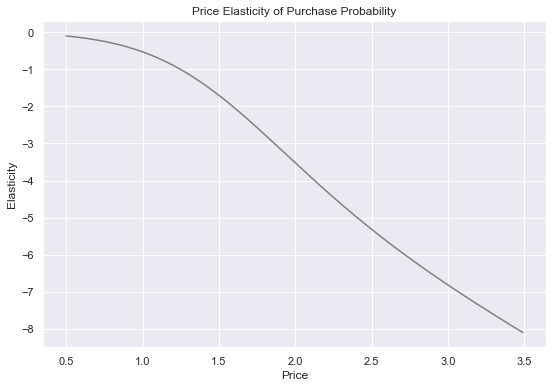

In [14]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

## Purchase Probability by Segments

### $\color{green}{\text{Segment 1 - Career-Focused}}$

In [15]:
df_pa_segment_1 = df_pa[df_pa['Segment'] == 1]

In [16]:
Y = df_pa_segment_1['Incidence']

In [17]:
X = pd.DataFrame()

In [18]:
X['Mean_Price'] = (df_pa_segment_1['Price_1'] + 
                   df_pa_segment_1['Price_2'] + 
                   df_pa_segment_1['Price_3'] + 
                   df_pa_segment_1['Price_4'] + 
                   df_pa_segment_1['Price_5']) / 5

In [19]:
model_incidence_segment_1 = LogisticRegression(solver = 'sag')
model_incidence_segment_1.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
model_incidence_segment_1.coef_

array([[-1.71286244]])

In [21]:
Y_segment_1 = model_incidence_segment_1.predict_proba(df_price_range)
purchase_pr_segment_1 = Y_segment_1[:][:, 1]
pe_segment_1 = model_incidence_segment_1.coef_[:, 0] * price_range * (1 - purchase_pr_segment_1)
Y_segment_1

array([[0.13903719, 0.86096281],
       [0.1411003 , 0.8588997 ],
       [0.14318892, 0.85681108],
       [0.14530323, 0.85469677],
       [0.14744339, 0.85255661],
       [0.14960955, 0.85039045],
       [0.15180187, 0.84819813],
       [0.1540205 , 0.8459795 ],
       [0.15626557, 0.84373443],
       [0.15853724, 0.84146276],
       [0.16083564, 0.83916436],
       [0.1631609 , 0.8368391 ],
       [0.16551315, 0.83448685],
       [0.16789251, 0.83210749],
       [0.17029908, 0.82970092],
       [0.172733  , 0.827267  ],
       [0.17519435, 0.82480565],
       [0.17768325, 0.82231675],
       [0.18019978, 0.81980022],
       [0.18274402, 0.81725598],
       [0.18531608, 0.81468392],
       [0.187916  , 0.812084  ],
       [0.19054388, 0.80945612],
       [0.19319975, 0.80680025],
       [0.19588369, 0.80411631],
       [0.19859574, 0.80140426],
       [0.20133593, 0.79866407],
       [0.20410431, 0.79589569],
       [0.20690088, 0.79309912],
       [0.20972568, 0.79027432],
       [0.

### Results

In [22]:
df_price_elasticities['PE_Segment_1'] = pe_segment_1

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

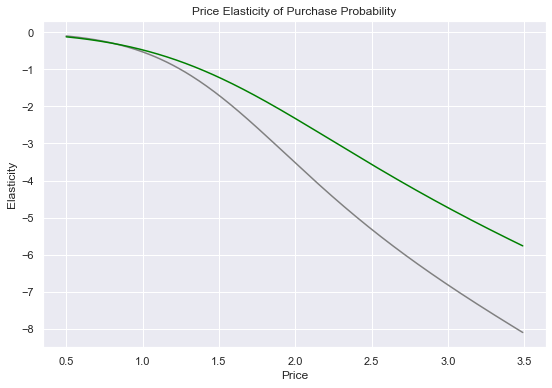

In [23]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

### $\color{red}{\text{Segment 2 - Fewer-Opportunities}}$

In [24]:
df_pa_segment_2 = df_pa[df_pa['Segment'] == 2]

In [25]:
Y = df_pa_segment_2['Incidence']

X = pd.DataFrame()
X['Mean_Price'] = (df_pa_segment_2['Price_1'] + 
                   df_pa_segment_2['Price_2'] + 
                   df_pa_segment_2['Price_3'] + 
                   df_pa_segment_2['Price_4'] + 
                   df_pa_segment_2['Price_5']) / 5

model_incidence_segment2 = LogisticRegression(solver = 'sag')
model_incidence_segment2.fit(X, Y)

model_incidence_segment2.coef_
Y_segment_2 = model_incidence_segment2.predict_proba(df_price_range)
purchase_pr_segment2 = Y_segment_2[:][: , 1]
pe_segment2 = model_incidence_segment2.coef_[:,0] * price_range * ( 1- purchase_pr_segment2)

### Results

In [26]:
df_price_elasticities['PE_Segment_2'] = pe_segment2

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

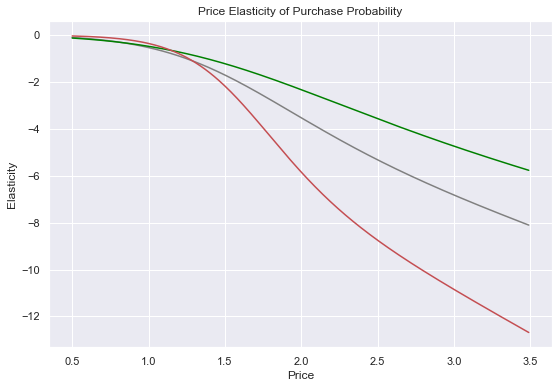

In [27]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.plot(price_range, pe_segment2, color = 'r')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

## ${\textbf{Homework}}$

### $\color{blue}{\text{Segment 0 - Standard}}$

In [28]:
df_pa_segment_0 = df_pa[df_pa['Segment'] == 0]

Y = df_pa_segment_0['Incidence']

X = pd.DataFrame()
X['Mean_Price'] = (df_pa_segment_0['Price_1'] + 
                   df_pa_segment_0['Price_2'] + 
                   df_pa_segment_0['Price_3'] + 
                   df_pa_segment_0['Price_4'] + 
                   df_pa_segment_0['Price_5']) / 5

model_incidence_segment0 = LogisticRegression(solver = 'sag')
model_incidence_segment0.fit(X, Y)

model_incidence_segment0.coef_
Y_segment_0 = model_incidence_segment0.predict_proba(df_price_range)
purchase_pr_segment0 = Y_segment_0[:][: , 1]
pe_segment0 = model_incidence_segment0.coef_[:,0] * price_range *( 1- purchase_pr_segment0)
df_price_elasticities.insert(2, column = 'PE_Segment_0', value = pe_segment0)

### $\color{orange}{\text{Segment 3 - Well-Off}}$

In [29]:
df_pa_segment_3 = df_pa[df_pa['Segment'] == 3]

Y = df_pa_segment_3['Incidence']

X = pd.DataFrame()
X['Mean_Price'] = (df_pa_segment_3['Price_1'] + 
                   df_pa_segment_3['Price_2'] + 
                   df_pa_segment_3['Price_3'] + 
                   df_pa_segment_3['Price_4'] + 
                   df_pa_segment_3['Price_5']) / 5

model_incidence_segment3 = LogisticRegression(solver = 'sag')
model_incidence_segment3.fit(X, Y)

model_incidence_segment3.coef_
Y_segment_3 = model_incidence_segment2.predict_proba(df_price_range)
purchase_pr_segment3 = Y_segment_3[:][: , 1]
pe_segment3 = model_incidence_segment3.coef_[:,0] * price_range *( 1- purchase_pr_segment3)
df_price_elasticities['PE_Segment_3'] = pe_segment3
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3
0,0.50,-0.096237,-0.211167,-0.119076,-0.030938,-0.015565
1,0.51,-0.100296,-0.217737,-0.123260,-0.032706,-0.016454
2,0.52,-0.104481,-0.224415,-0.127537,-0.034561,-0.017387
3,0.53,-0.108797,-0.231201,-0.131909,-0.036506,-0.018366
4,0.54,-0.113245,-0.238097,-0.136377,-0.038546,-0.019393
5,0.55,-0.117829,-0.245102,-0.140943,-0.040686,-0.020469
6,0.56,-0.122553,-0.252219,-0.145609,-0.042929,-0.021597
7,0.57,-0.127420,-0.259447,-0.150375,-0.045279,-0.022780
8,0.58,-0.132433,-0.266787,-0.155244,-0.047743,-0.024019
9,0.59,-0.137595,-0.274240,-0.160216,-0.050324,-0.025318


### ${\textbf{Results}}$

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

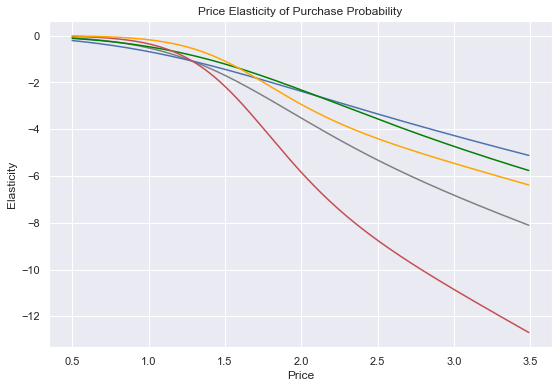

In [30]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment0, color = 'b')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.plot(price_range, pe_segment2, color = 'r')
plt.plot(price_range, pe_segment3, color = 'orange')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

## Purchase Probability with Promotion Feature

### Data Preparation

In [31]:
Y = df_pa['Incidence']

In [32]:
X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1'] + 
                   df_pa['Price_2'] + 
                   df_pa['Price_3'] + 
                   df_pa['Price_4'] + 
                   df_pa['Price_5']) / 5

In [33]:
X['Mean_Promotion'] = (df_pa['Promotion_1'] +
                       df_pa['Promotion_2'] +
                       df_pa['Promotion_3'] +
                       df_pa['Promotion_4'] +
                       df_pa['Promotion_5'] ) / 5
X.head()

,Mean_Price,Mean_Promotion
0,2.044,0.2
1,2.028,0.0
2,2.028,0.0
3,2.028,0.0
4,2.030,0.0


## Model Estimation

In [34]:
model_incidence_promotion = LogisticRegression(solver = 'sag')
model_incidence_promotion.fit(X, Y)
model_incidence_promotion.coef_

array([[-1.4939312 ,  0.56148595]])

## Price Elasticity with Promotion

In [35]:
df_price_elasticity_promotion = pd.DataFrame(price_range)
df_price_elasticity_promotion = df_price_elasticity_promotion.rename(columns = {0: "Price_Range"})

In [36]:
df_price_elasticity_promotion['Promotion'] = 1

In [37]:
Y_promotion = model_incidence_promotion.predict_proba(df_price_elasticity_promotion)

In [38]:
promo = Y_promotion[:, 1]
price_elasticity_promo = (model_incidence_promotion.coef_[:, 0] * price_range) * (1 - promo)

In [39]:
df_price_elasticities['Elasticity_Promotion_1'] = price_elasticity_promo
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1
0,0.50,-0.096237,-0.211167,-0.119076,-0.030938,-0.015565,-0.125747
1,0.51,-0.100296,-0.217737,-0.123260,-0.032706,-0.016454,-0.129863
2,0.52,-0.104481,-0.224415,-0.127537,-0.034561,-0.017387,-0.134058
3,0.53,-0.108797,-0.231201,-0.131909,-0.036506,-0.018366,-0.138334
4,0.54,-0.113245,-0.238097,-0.136377,-0.038546,-0.019393,-0.142690
5,0.55,-0.117829,-0.245102,-0.140943,-0.040686,-0.020469,-0.147128
6,0.56,-0.122553,-0.252219,-0.145609,-0.042929,-0.021597,-0.151649
7,0.57,-0.127420,-0.259447,-0.150375,-0.045279,-0.022780,-0.156254
8,0.58,-0.132433,-0.266787,-0.155244,-0.047743,-0.024019,-0.160944
9,0.59,-0.137595,-0.274240,-0.160216,-0.050324,-0.025318,-0.165720


## Price Elasticity without Promotion

In [40]:
df_price_elasticity_promotion_no = pd.DataFrame(price_range)
df_price_elasticity_promotion_no = df_price_elasticity_promotion_no.rename(columns = {0: "Price_Range"})

In [41]:
df_price_elasticity_promotion_no['Promotion'] = 0

In [42]:
Y_no_promo = model_incidence_promotion.predict_proba(df_price_elasticity_promotion_no)

In [43]:
no_promo = Y_no_promo[: , 1]

In [44]:
price_elasticity_no_promo = model_incidence_promotion.coef_[:, 0] * price_range *(1- no_promo)

In [45]:
df_price_elasticities['Elasticity_Promotion_0'] = price_elasticity_no_promo

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability with and without Promotion')

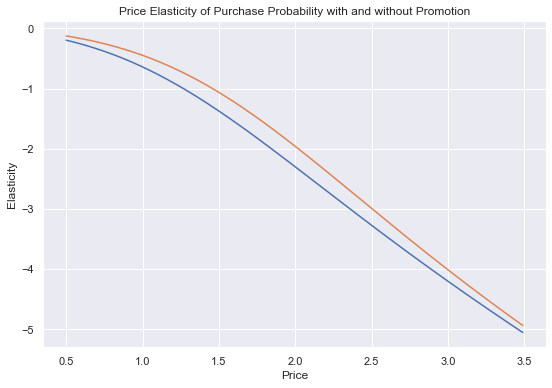

In [46]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_no_promo)
plt.plot(price_range, price_elasticity_promo)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability with and without Promotion')

## ${\textbf{Brand Choice}}$

### Data Preparation

In [47]:
brand_choice = df_pa[df_pa['Incidence'] == 1]

In [48]:
pd.options.display.max_rows = 100
brand_choice

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,47,1,110866,1,0,2,0,0,1,0
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,47,1,110866,1,0,2,0,0,1,0
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,47,1,110866,1,0,2,0,0,1,0
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,47,1,110866,1,0,2,0,0,1,0
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,47,1,110866,1,0,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58621,200000500,296,1,2,6,0,0,1.48,1.89,2.01,...,42,1,120946,1,0,2,0,0,1,0
58648,200000500,460,1,1,12,0,0,1.35,1.57,2.02,...,42,1,120946,1,0,2,0,0,1,0
58674,200000500,641,1,2,7,0,0,1.50,1.85,2.06,...,42,1,120946,1,0,2,0,0,1,0
58687,200000500,697,1,2,6,0,0,1.42,1.51,1.97,...,42,1,120946,1,0,2,0,0,1,0


In [49]:
Y = brand_choice['Brand']

In [50]:
brand_choice.columns.values

array(['ID', 'Day', 'Incidence', 'Brand', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
       'Promotion_4', 'Promotion_5', 'Sex', 'Marital status', 'Age',
       'Education', 'Income', 'Occupation', 'Settlement size', 'Segment',
       'Segment_0', 'Segment_1', 'Segment_2', 'Segment_3'], dtype=object)

In [51]:
features = ['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']
X = brand_choice[features]

In [52]:
model_brand_choice = LogisticRegression(solver = 'sag', multi_class = 'multinomial')
model_brand_choice.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
model_brand_choice.coef_

array([[-3.91595863,  0.65846066,  2.41770959,  0.70408317, -0.20211242],
       [ 1.27461403, -1.87985447, -0.21263794, -0.20634039,  0.5878726 ],
       [ 1.6241841 ,  0.56210551,  0.50087146,  1.03950748,  0.45278419],
       [ 0.57453894,  0.39558905, -1.40059874, -1.2462432 ,  0.24935295],
       [ 0.44262156,  0.26369926, -1.30534437, -0.29100707, -1.08789732]])

In [54]:
bc_coef = pd.DataFrame(model_brand_choice.coef_)
bc_coef

,0,1,2,3,4
0,-3.915959,0.658461,2.417710,0.704083,-0.202112
1,1.274614,-1.879854,-0.212638,-0.206340,0.587873
2,1.624184,0.562106,0.500871,1.039507,0.452784
3,0.574539,0.395589,-1.400599,-1.246243,0.249353
4,0.442622,0.263699,-1.305344,-0.291007,-1.087897


In [55]:
bc_coef = pd.DataFrame(np.transpose(model_brand_choice.coef_))
coefficients = ['Coef_Brand_1', 'Coef_Brand_2', 'Coef_Brand_3', 'Coef_Brand_4', 'Coef_Brand_5']
bc_coef.columns = [coefficients]
prices = ['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)
bc_coef

,Coef_Brand_1,Coef_Brand_2,Coef_Brand_3,Coef_Brand_4,Coef_Brand_5
Price_1,-3.92,1.27,1.62,0.57,0.44
Price_2,0.66,-1.88,0.56,0.40,0.26
Price_3,2.42,-0.21,0.50,-1.40,-1.31
Price_4,0.70,-0.21,1.04,-1.25,-0.29
Price_5,-0.20,0.59,0.45,0.25,-1.09


## Own Price Elasticity Brand 5

In [56]:
df_own_brand_5 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5['Price_1'] = brand_choice['Price_1'].mean()
df_own_brand_5['Price_2'] = brand_choice['Price_2'].mean()
df_own_brand_5['Price_3'] = brand_choice['Price_3'].mean()
df_own_brand_5['Price_4'] = brand_choice['Price_4'].mean()
df_own_brand_5['Price_5'] = price_range
df_own_brand_5

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,2.159658,0.50
1,1.384559,1.764717,2.006694,2.159658,0.51
2,1.384559,1.764717,2.006694,2.159658,0.52
3,1.384559,1.764717,2.006694,2.159658,0.53
4,1.384559,1.764717,2.006694,2.159658,0.54
...,...,...,...,...,...
295,1.384559,1.764717,2.006694,2.159658,3.45
296,1.384559,1.764717,2.006694,2.159658,3.46
297,1.384559,1.764717,2.006694,2.159658,3.47
298,1.384559,1.764717,2.006694,2.159658,3.48


In [57]:
predict_brand_5 = model_brand_choice.predict_proba(df_own_brand_5)

In [58]:
pr_own_brand_5 = predict_brand_5[: ][:, 4]

In [59]:
beta5 = bc_coef.iloc[4, 4]
beta5

-1.09

In [60]:
own_price_elasticity_brand_5 = beta5 * price_range * (1 - pr_own_brand_5)

In [61]:
df_price_elasticities['Brand_5'] = own_price_elasticity_brand_5
pd.options.display.max_rows = None
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5
0,0.50,-0.096237,-0.211167,-0.119076,-0.030938,-0.015565,-0.125747,-0.195657,-0.049056
1,0.51,-0.100296,-0.217737,-0.123260,-0.032706,-0.016454,-0.129863,-0.201779,-0.050617
2,0.52,-0.104481,-0.224415,-0.127537,-0.034561,-0.017387,-0.134058,-0.208003,-0.052207
3,0.53,-0.108797,-0.231201,-0.131909,-0.036506,-0.018366,-0.138334,-0.214330,-0.053827
4,0.54,-0.113245,-0.238097,-0.136377,-0.038546,-0.019393,-0.142690,-0.220761,-0.055477
5,0.55,-0.117829,-0.245102,-0.140943,-0.040686,-0.020469,-0.147128,-0.227298,-0.057159
6,0.56,-0.122553,-0.252219,-0.145609,-0.042929,-0.021597,-0.151649,-0.233940,-0.058871
7,0.57,-0.127420,-0.259447,-0.150375,-0.045279,-0.022780,-0.156254,-0.240688,-0.060615
8,0.58,-0.132433,-0.266787,-0.155244,-0.047743,-0.024019,-0.160944,-0.247544,-0.062391
9,0.59,-0.137595,-0.274240,-0.160216,-0.050324,-0.025318,-0.165720,-0.254508,-0.064200


Text(0.5, 1.0, 'Own Price Elasticity of Purchase Probability for Brand 5')

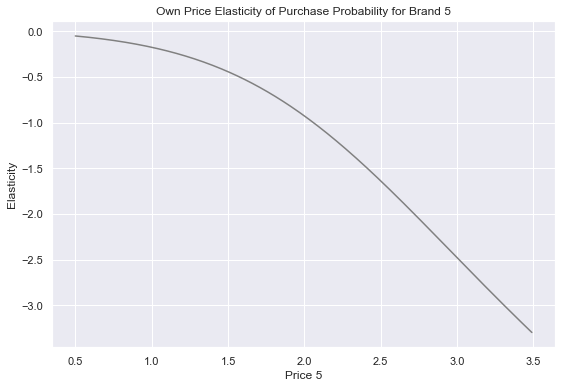

In [62]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, own_price_elasticity_brand_5, color = 'grey')
plt.xlabel('Price 5')
plt.ylabel('Elasticity')
plt.title('Own Price Elasticity of Purchase Probability for Brand 5')

## Cross Price Elasticity Brand 5, Cross Brand 4

In [63]:
df_brand5_cross_brand4 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4['Price_1'] = brand_choice['Price_1'].mean()
df_brand5_cross_brand4['Price_2'] = brand_choice['Price_2'].mean()
df_brand5_cross_brand4['Price_3'] = brand_choice['Price_3'].mean()
df_brand5_cross_brand4['Price_4'] = price_range
df_brand5_cross_brand4['Price_5'] = brand_choice['Price_5'].mean()

In [64]:
df_brand5_cross_brand4.head()

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,0.50,2.654296
1,1.384559,1.764717,2.006694,0.51,2.654296
2,1.384559,1.764717,2.006694,0.52,2.654296
3,1.384559,1.764717,2.006694,0.53,2.654296
4,1.384559,1.764717,2.006694,0.54,2.654296


In [65]:
predict_brand5_cross_brand4 = model_brand_choice.predict_proba(df_brand5_cross_brand4)

In [66]:
pr_brand_4 = predict_brand5_cross_brand4[:][:, 3]

In [67]:
beta5

-1.09

In [68]:
brand5_cross_brand4_price_elasticity = -beta5 * price_range * pr_brand_4

-1.09

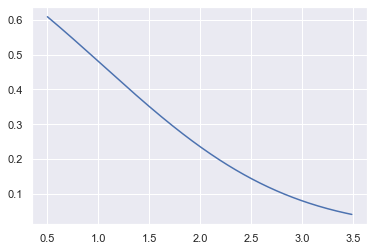

In [83]:
#kontroll
pd.options.display.max_columns = 1500

plt.plot(price_range,pr_brand_4)
pd.DataFrame([pr_brand_4,price_range])


In [70]:
df_price_elasticities['Brand_5_Cross_Brand_4'] = brand5_cross_brand4_price_elasticity
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4
0,0.50,-0.096237,-0.211167,-0.119076,-0.030938,-0.015565,-0.125747,-0.195657,-0.049056,0.332011
1,0.51,-0.100296,-0.217737,-0.123260,-0.032706,-0.016454,-0.129863,-0.201779,-0.050617,0.337287
2,0.52,-0.104481,-0.224415,-0.127537,-0.034561,-0.017387,-0.134058,-0.208003,-0.052207,0.342506
3,0.53,-0.108797,-0.231201,-0.131909,-0.036506,-0.018366,-0.138334,-0.214330,-0.053827,0.347668
4,0.54,-0.113245,-0.238097,-0.136377,-0.038546,-0.019393,-0.142690,-0.220761,-0.055477,0.352773
5,0.55,-0.117829,-0.245102,-0.140943,-0.040686,-0.020469,-0.147128,-0.227298,-0.057159,0.357820
6,0.56,-0.122553,-0.252219,-0.145609,-0.042929,-0.021597,-0.151649,-0.233940,-0.058871,0.362809
7,0.57,-0.127420,-0.259447,-0.150375,-0.045279,-0.022780,-0.156254,-0.240688,-0.060615,0.367740
8,0.58,-0.132433,-0.266787,-0.155244,-0.047743,-0.024019,-0.160944,-0.247544,-0.062391,0.372614
9,0.59,-0.137595,-0.274240,-0.160216,-0.050324,-0.025318,-0.165720,-0.254508,-0.064200,0.377429


Text(0.5, 1.0, 'Cross Price Elasticity of Brand 5 wrt to Brand 4')

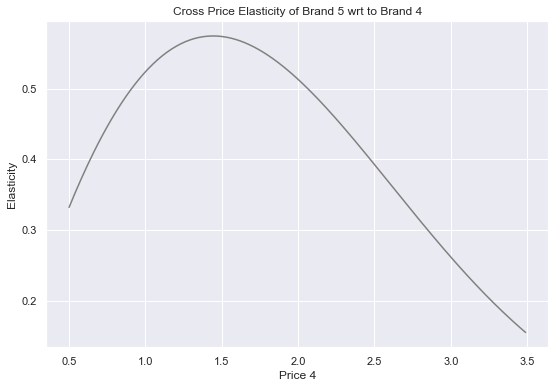

In [71]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, brand5_cross_brand4_price_elasticity, color = 'grey')
plt.xlabel('Price 4')
plt.ylabel('Elasticity')
plt.title('Cross Price Elasticity of Brand 5 wrt to Brand 4')

## Own and Cross-Price Elasticity by Segment

### $\color{orange}{\text{Well-Off}}$

In [72]:
brand_choice_s3 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s3 = brand_choice_s3[brand_choice_s3['Segment'] == 3]

pd.options.display.max_rows = 100
brand_choice_s3

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
101,200000002,6,1,4,1,0,0,1.59,1.87,2.01,2.09,2.66,0,0,0,0,0,1,1,52,2,159052,2,1,3,0,0,0,1
115,200000002,100,1,4,2,0,0,1.47,1.90,1.95,2.12,2.67,0,0,0,1,0,1,1,52,2,159052,2,1,3,0,0,0,1
138,200000002,283,1,4,3,0,0,1.37,1.89,2.00,2.14,2.64,0,0,0,0,0,1,1,52,2,159052,2,1,3,0,0,0,1
141,200000002,307,1,4,1,0,0,1.34,1.89,2.01,2.03,2.68,1,0,0,1,0,1,1,52,2,159052,2,1,3,0,0,0,1
153,200000002,422,1,4,1,0,0,1.34,1.89,2.02,2.21,2.65,0,0,0,1,0,1,1,52,2,159052,2,1,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57346,200000489,687,1,4,1,4,1,1.50,1.87,2.06,2.24,2.78,0,0,0,0,0,1,1,44,2,193816,2,1,3,0,0,0,1
57347,200000489,693,1,4,2,4,1,1.42,1.51,2.02,2.24,2.77,0,1,0,0,0,1,1,44,2,193816,2,1,3,0,0,0,1
57348,200000489,701,1,4,3,4,1,1.42,1.85,1.99,2.24,2.76,0,0,1,0,0,1,1,44,2,193816,2,1,3,0,0,0,1
57350,200000489,715,1,4,2,0,0,1.50,1.80,2.09,2.24,2.79,0,0,0,0,0,1,1,44,2,193816,2,1,3,0,0,0,1


In [73]:
# model estimation
Y = brand_choice_s3['Brand']
brand_choice_s3 = pd.get_dummies(brand_choice_s3, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s3[features]
model_brand_choice_s3 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s3.fit(X, Y)

#coefficients table for segment 3
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s3.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)
bc_coef

,Coef_Brand_1,Coef_Brand_2,Coef_Brand_3,Coef_Brand_4,Coef_Brand_5
Price_1,-2.15,1.33,0.82,0.12,-0.11
Price_2,-0.96,-1.38,1.29,0.78,0.27
Price_3,2.01,-1.65,-0.49,0.03,0.11
Price_4,2.52,0.96,-0.25,-1.90,-1.33
Price_5,-0.99,-0.30,1.17,0.56,-0.44


### $\color{orange}{\text{Own-Brand Price Elasticity}}$

In [74]:
df_own_brand_5_s3 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s3['Price_1'] = brand_choice_s3['Price_1'].mean()
df_own_brand_5_s3['Price_2'] = brand_choice_s3['Price_2'].mean()
df_own_brand_5_s3['Price_3'] = brand_choice_s3['Price_3'].mean()
df_own_brand_5_s3['Price_4'] = brand_choice_s3['Price_4'].mean()
df_own_brand_5_s3['Price_5'] = price_range

predict_own_brand_5_s3 = model_brand_choice_s3.predict_proba(df_own_brand_5_s3)
pr_own_brand_5_s3 = predict_own_brand_5_s3[: ][: , 4]

own_price_elasticity_brand_5_s3 =  beta5 * price_range * (1 - pr_own_brand_5_s3)
df_price_elasticities['Brand 5 S3'] = own_price_elasticity_brand_5_s3

### $\color{orange}{\text{Cross-Brand Price Elasticity}}$

In [75]:
df_brand5_cross_brand4_s3 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s3['Price_1'] = brand_choice_s3['Price_1'].mean()
df_brand5_cross_brand4_s3['Price_2'] = brand_choice_s3['Price_2'].mean()
df_brand5_cross_brand4_s3['Price_3'] = brand_choice_s3['Price_3'].mean()
df_brand5_cross_brand4_s3['Price_4'] = price_range
df_brand5_cross_brand4_s3['Price_5'] = brand_choice_s3['Price_5'].mean()

predict_brand5_cross_brand4_s3 = model_brand_choice_s3.predict_proba(df_brand5_cross_brand4_s3)
pr_cross_brand_5_s3 = predict_brand5_cross_brand4_s3[: ][: , 3]

brand5_cross_brand4_price_elasticity_s3 = -beta5 * price_range * pr_cross_brand_5_s3
df_price_elasticities['Brand_5_Cross_Brand_4_S3'] = brand5_cross_brand4_price_elasticity_s3
pd.options.display.max_rows = None
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S3,Brand_5_Cross_Brand_4_S3
0,0.50,-0.096237,-0.211167,-0.119076,-0.030938,-0.015565,-0.125747,-0.195657,-0.049056,0.332011,-0.297352,0.482421
1,0.51,-0.100296,-0.217737,-0.123260,-0.032706,-0.016454,-0.129863,-0.201779,-0.050617,0.337287,-0.303398,0.491727
2,0.52,-0.104481,-0.224415,-0.127537,-0.034561,-0.017387,-0.134058,-0.208003,-0.052207,0.342506,-0.309455,0.501016
3,0.53,-0.108797,-0.231201,-0.131909,-0.036506,-0.018366,-0.138334,-0.214330,-0.053827,0.347668,-0.315522,0.510290
4,0.54,-0.113245,-0.238097,-0.136377,-0.038546,-0.019393,-0.142690,-0.220761,-0.055477,0.352773,-0.321600,0.519548
5,0.55,-0.117829,-0.245102,-0.140943,-0.040686,-0.020469,-0.147128,-0.227298,-0.057159,0.357820,-0.327690,0.528791
6,0.56,-0.122553,-0.252219,-0.145609,-0.042929,-0.021597,-0.151649,-0.233940,-0.058871,0.362809,-0.333792,0.538017
7,0.57,-0.127420,-0.259447,-0.150375,-0.045279,-0.022780,-0.156254,-0.240688,-0.060615,0.367740,-0.339906,0.547227
8,0.58,-0.132433,-0.266787,-0.155244,-0.047743,-0.024019,-0.160944,-0.247544,-0.062391,0.372614,-0.346032,0.556421
9,0.59,-0.137595,-0.274240,-0.160216,-0.050324,-0.025318,-0.165720,-0.254508,-0.064200,0.377429,-0.352172,0.565598


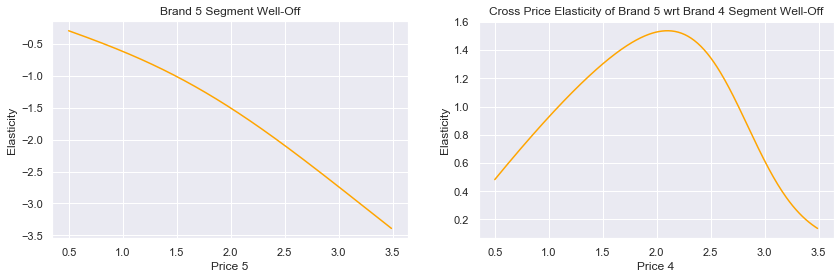

In [76]:
fig, axs = plt.subplots(1, 2, figsize = (14, 4))
axs[0].plot(price_range, own_price_elasticity_brand_5_s3, color = 'orange')
axs[0].set_title('Brand 5 Segment Well-Off')
axs[0].set_xlabel('Price 5')

axs[1].plot(price_range, brand5_cross_brand4_price_elasticity_s3, color = 'orange')
axs[1].set_title('Cross Price Elasticity of Brand 5 wrt Brand 4 Segment Well-Off')
axs[1].set_xlabel('Price 4')

for ax in axs.flat:
    ax.set(ylabel = 'Elasticity')

## Homework - compute own and cross brand elasticities for the Standard, Career-focused and Fewer-Opportunities segments.

### $\color{blue}{\text{Standard}}$

In [84]:
#calculate the beta for own brand first, I will use it on the other segments as well
df_brand_s0 = df_pa[(df_pa['Incidence'] == 1)]
Y_own = df_brand_s0['Brand']
X_own = df_brand_s0[['Price_1','Price_2','Price_3','Price_4','Price_5']]
lr_own_brand = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 200)
lr_own_brand.fit(X_own,Y_own)  
beta5 = lr_own_brand.coef_[4,4].round(2)
                      
                      
    
#Extracting only incidence = 1 and segment = 0 for logistic regression for cross brand
df_brand_choice_s0 = df_pa[(df_pa['Incidence'] == 1) & (df_pa['Segment'] == 0)] 

#Defining X and Y for logisitc regression
Y = df_brand_choice_s0['Brand']
X = df_brand_choice_s0[['Price_1','Price_2','Price_3','Price_4','Price_5']]

#logisitc regression model
lr_brand_choice_s0 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 200)
lr_brand_choice_s0.fit(X,Y)

#Predict the purchase probability for own brand
#Create a df with same length as price_range
df_ownbrand = pd.DataFrame(index=np.arange(price_range.size))

df_ownbrand['Price_1'] = df_brand_s0['Price_1'].mean()
df_ownbrand['Price_2'] = df_brand_s0['Price_2'].mean()
df_ownbrand['Price_3'] = df_brand_s0['Price_3'].mean()
df_ownbrand['Price_4'] = df_brand_s0['Price_4'].mean()
df_ownbrand['Price_5'] = price_range

pr_ownbrand = lr_brand_choice_s0.predict_proba(df_ownbrand)

#Calculate the beta 
coefs = pd.DataFrame(np.transpose(lr_brand_choice_s0.coef_))
coefs.columns = [coefficients]
coefs.index = [prices]
beta = coefs.iloc[4,4].round(2)

### $\color{blue}{\text{Own-Brand Price Elasticity}}$

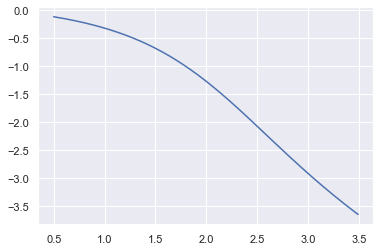

In [85]:
#Calculate the price elasticity of purchase probabiilty cross brand
pe_own_brand5_s0 = beta5*price_range*(1-pr_ownbrand[:,4])
plt.plot(price_range, pe_own_brand5_s0)


### $\color{blue}{\text{Cross-Brand Price Elasticity}}$

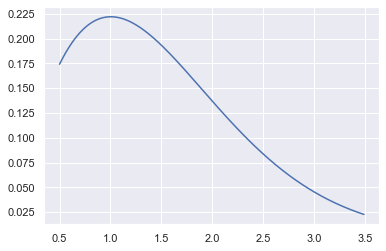

In [88]:
#Predict the purchase probability for cross brand
#Create a df with same length as price_range
df_brand5_cross_brand_brand4_s0 = pd.DataFrame(index=np.arange(price_range.size))

df_brand5_cross_brand_brand4_s0['Price_1'] = df_brand_choice_s0['Price_1'].mean()
df_brand5_cross_brand_brand4_s0['Price_2'] = df_brand_choice_s0['Price_2'].mean()
df_brand5_cross_brand_brand4_s0['Price_3'] = df_brand_choice_s0['Price_3'].mean()
df_brand5_cross_brand_brand4_s0['Price_4'] = price_range
df_brand5_cross_brand_brand4_s0['Price_5'] = df_brand_choice_s0['Price_5'].mean()

pr_brand5_cross_brand_brand4_s0 = lr_brand_choice_s0.predict_proba(df_brand5_cross_brand_brand4_s0)

#Calculate the price elasticity of purchase probabiilty cross brand
pe_brand5_cross_brand_brand4_s0 = -beta5*price_range*pr_brand5_cross_brand_brand4_s0[:,3]
plt.plot(price_range,pe_brand5_cross_brand_brand4_s0)


### $\color{green}{\text{Career-Focused}}$

In [89]:
#Extracting only incidence = 1 and segment 1 (carrier-focused) for logistic regression 
df_brand_choice_s1 = df_pa[(df_pa['Incidence'] == 1) & (df_pa['Segment'] == 1)]
Y = df_brand_choice_s1['Brand']
X = df_brand_choice_s1[['Price_1','Price_2','Price_3','Price_4','Price_5']]
lr_brand_choice_s1 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
lr_brand_choice_s1.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

### $\color{green}{\text{Own-Brand Price Elasticity}}$

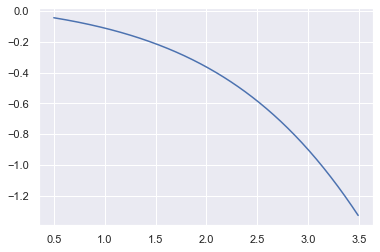

In [90]:
df_own_brand5 = pd.DataFrame(index=np.arange(price_range.size))
df_own_brand5['Price_1'] = df_brand_choice_s1['Price_1'].mean()
df_own_brand5['Price_2'] = df_brand_choice_s1['Price_2'].mean()
df_own_brand5['Price_3'] = df_brand_choice_s1['Price_3'].mean()
df_own_brand5['Price_4'] = df_brand_choice_s1['Price_4'].mean()
df_own_brand5['Price_5'] = price_range

pr_own_brand5 = lr_brand_choice_s1.predict_proba(df_own_brand5)[:,4]
pe_own_brand5_s1 = beta5*price_range*(1-pr_own_brand5)
plt.plot(price_range,pe_own_brand5_s1)


### $\color{green}{\text{Cross-Brand Price Elasticity}}$

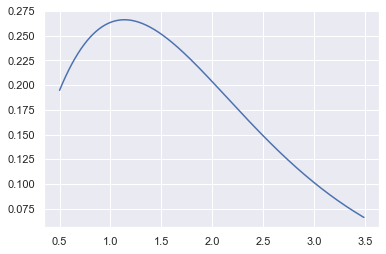

In [91]:
df_brand5_cross_brand_brand4_s1 = pd.DataFrame(index=np.arange(price_range.size))
df_brand5_cross_brand_brand4_s1['Price_1'] = df_brand_choice_s1['Price_1'].mean()
df_brand5_cross_brand_brand4_s1['Price_2'] = df_brand_choice_s1['Price_2'].mean()
df_brand5_cross_brand_brand4_s1['Price_3'] = df_brand_choice_s1['Price_3'].mean()
df_brand5_cross_brand_brand4_s1['Price_4'] = price_range
df_brand5_cross_brand_brand4_s1['Price_5'] = df_brand_choice_s1['Price_5'].mean()

pr_brand5_cross_brand_brand4_s1 = lr_brand_choice_s1.predict_proba(df_brand5_cross_brand_brand4_s1)[:,3]
pe_brand5_cross_brand_brand4_s1 = -beta5*price_range*pr_brand5_cross_brand_brand4_s1
plt.plot(price_range,pe_brand5_cross_brand_brand4_s1)


### $\color{red}{\text{Fewer-Opportunities}}$

In [92]:
#Extracting only segment = 2 (Fewer-opportunities) that has incidence = 1 for logistic regression 
df_brand_choice_s2 = df_pa[(df_pa['Incidence'] == 1) & (df_pa['Segment'] == 2)]
Y = df_brand_choice_s2['Brand']
X = df_brand_choice_s2[['Price_1','Price_2','Price_3','Price_4','Price_5']]

#Logistic Regression model
lr_brand_choice_s2 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
lr_brand_choice_s2.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

### $\color{red}{\text{Own-Brand Price Elasticity}}$

Text(0.5, 1.0, 'Own Brand Price Elasticity of Purchase Probability')

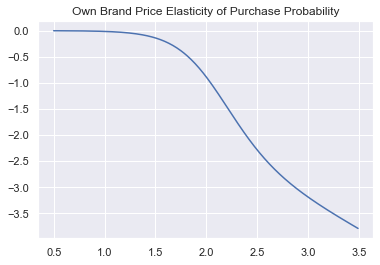

In [93]:
#Price inputs for predict probability 
#Create an empty data frame to put them there
df_own_brand5 = pd.DataFrame(index=np.arange(price_range.size))
df_own_brand5['Price_1'] = df_brand_choice_s2['Price_1'].mean()
df_own_brand5['Price_2'] = df_brand_choice_s2['Price_2'].mean()
df_own_brand5['Price_3'] = df_brand_choice_s2['Price_3'].mean()
df_own_brand5['Price_4'] = df_brand_choice_s2['Price_4'].mean()
df_own_brand5['Price_5'] = price_range

pr_own_brand5_s2 = lr_brand_choice_s2.predict_proba(df_own_brand5)[:,4]
pe_own_brand5_s2 = beta5*price_range*(1-pr_own_brand5_s2)
plt.plot(price_range,pe_own_brand5_s2)
plt.title('Own Brand Price Elasticity of Purchase Probability')

### $\color{red}{\text{Cross-Brand Price Elasticity}}$

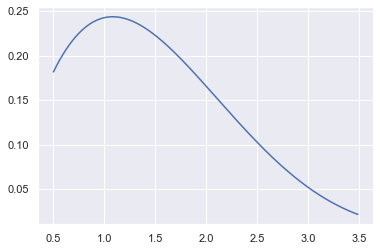

In [94]:
#Price inputs for predict probability 
#Create an empty data frame to put them there
df_brand5_cross_brand_brand4_s2 = pd.DataFrame(index=np.arange(price_range.size))
df_brand5_cross_brand_brand4_s2['Price_1'] = df_brand_choice_s2['Price_1'].mean()
df_brand5_cross_brand_brand4_s2['Price_2'] = df_brand_choice_s2['Price_2'].mean()
df_brand5_cross_brand_brand4_s2['Price_3'] = df_brand_choice_s2['Price_3'].mean()
df_brand5_cross_brand_brand4_s2['Price_4'] = price_range
df_brand5_cross_brand_brand4_s2['Price_5'] = df_brand_choice_s2['Price_5'].mean()

pr_brand5_cross_brand_brand4_s2 = lr_brand_choice_s2.predict_proba(df_brand5_cross_brand_brand4_s2)[:,3]
pe_brand5_cross_brand_brand4_s2 = -beta5*price_range*pr_brand5_cross_brand_brand4_s2
plt.plot(price_range,pe_brand5_cross_brand_brand4_s2)

### Plot the own and cross brand price elasticities for the average customer and each of the four segments.

Text(0.5, 0, 'Price 4')

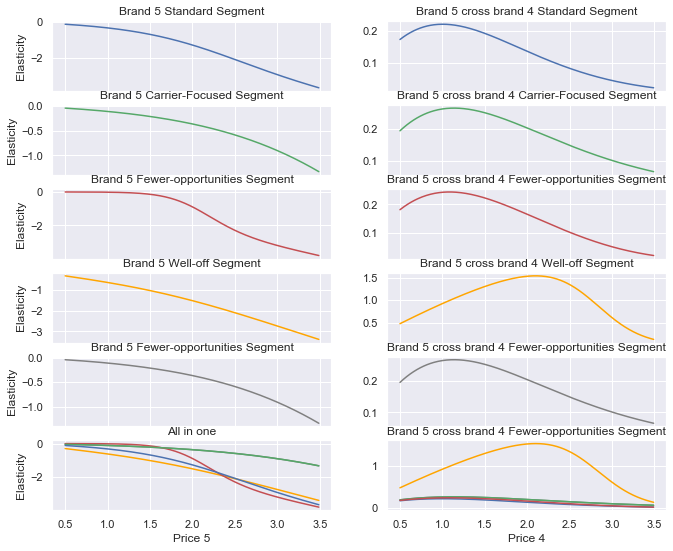

In [99]:
#Calculate the price elasticity for average customer first
df = df_pa[(df_pa['Incidence'] == 1)]
Y = df_brand_choice_s1['Brand']
X = df_brand_choice_s1[['Price_1','Price_2','Price_3','Price_4','Price_5']]
lr_brand_choice_avg = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
lr_brand_choice_avg.fit(X,Y)
df_own_brand5 = pd.DataFrame(index=np.arange(price_range.size))
df_own_brand5['Price_1'] = df_brand_choice_s1['Price_1'].mean()
df_own_brand5['Price_2'] = df_brand_choice_s1['Price_2'].mean()
df_own_brand5['Price_3'] = df_brand_choice_s1['Price_3'].mean()
df_own_brand5['Price_4'] = df_brand_choice_s1['Price_4'].mean()
df_own_brand5['Price_5'] = price_range

pr_own_brand5 = lr_brand_choice_avg.predict_proba(df_own_brand5)[:,4]
pe_avg = beta5*price_range*(1-pr_own_brand5)

df_own_brand5 = pd.DataFrame(index=np.arange(price_range.size))
df_own_brand5['Price_1'] = df_brand_choice_s1['Price_1'].mean()
df_own_brand5['Price_2'] = df_brand_choice_s1['Price_2'].mean()
df_own_brand5['Price_3'] = df_brand_choice_s1['Price_3'].mean()
df_own_brand5['Price_4'] = price_range
df_own_brand5['Price_5'] = df_brand_choice_s1['Price_5'].mean()

pr_own_brand5 = lr_brand_choice_avg.predict_proba(df_own_brand5)[:,3]
pe_avg_brand4 = -beta5*price_range*pr_own_brand5

fig1, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 2, figsize = (11, 9), sharex = True)

#Standard segment
ax1[0].plot(price_range, pe_own_brand5_s0) 
ax1[0].set_title('Brand 5 Standard Segment')
ax1[0].set_ylabel('Elasticity')
ax1[1].plot(price_range, pe_brand5_cross_brand_brand4_s0) 
ax1[1].set_title('Brand 5 cross brand 4 Standard Segment')

#Carrier-Focused
ax2[0].plot(price_range, pe_own_brand5_s1,color='g') 
ax2[0].set_title('Brand 5 Carrier-Focused Segment')
ax2[0].set_ylabel('Elasticity')
ax2[1].plot(price_range, pe_brand5_cross_brand_brand4_s1,color='g') 
ax2[1].set_title('Brand 5 cross brand 4 Carrier-Focused Segment')

#Fewer-opportunities
ax3[0].plot(price_range, pe_own_brand5_s2,color='r') 
ax3[0].set_title('Brand 5 Fewer-opportunities Segment')
ax3[0].set_ylabel('Elasticity')
ax3[1].plot(price_range, pe_brand5_cross_brand_brand4_s2,color='r') 
ax3[1].set_title('Brand 5 cross brand 4 Fewer-opportunities Segment')

#Well-off
ax4[0].plot(price_range, own_price_elasticity_brand_5_s3,color='orange') 
ax4[0].set_title('Brand 5 Well-off Segment')
ax4[0].set_ylabel('Elasticity')
ax4[1].plot(price_range, brand5_cross_brand4_price_elasticity_s3,color='orange') 
ax4[1].set_title('Brand 5 cross brand 4 Well-off Segment')

#Average customer
ax5[0].plot(price_range, pe_avg,color='grey') 
ax5[0].set_title('Brand 5 Fewer-opportunities Segment')
ax5[0].set_ylabel('Elasticity')
ax5[1].plot(price_range, pe_avg_brand4,color='grey') 
ax5[1].set_title('Brand 5 cross brand 4 Fewer-opportunities Segment')

#All in one!
ax6[0].plot(price_range, pe_avg,color='grey') 
ax6[0].plot(price_range, own_price_elasticity_brand_5_s3,color='orange') 
ax6[0].plot(price_range, pe_own_brand5_s2,color='r')
ax6[0].plot(price_range, pe_own_brand5_s1,color='g')
ax6[0].plot(price_range, pe_own_brand5_s0) 
ax6[0].set_title('All in one')
ax6[0].set_ylabel('Elasticity')
ax6[0].set_xlabel('Price 5')
ax6[1].plot(price_range, pe_avg_brand4,color='grey') 
ax6[1].plot(price_range, brand5_cross_brand4_price_elasticity_s3,color='orange') 
ax6[1].plot(price_range, pe_brand5_cross_brand_brand4_s0) 
ax6[1].plot(price_range, pe_brand5_cross_brand_brand4_s1,color='g') 
ax6[1].plot(price_range, pe_brand5_cross_brand_brand4_s2,color='r') 
ax6[1].set_title('Brand 5 cross brand 4 Fewer-opportunities Segment')
ax6[1].set_xlabel('Price 4')

